In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
file_path = 'resources/age_group_float.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head(10)


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),User Behavior Class,Age Group,Age Group Float
0,661,Google_Pixel_5,Android,50,1.5,387,12,146,1,50+,50.0
1,34,Google_Pixel_5,Android,46,2.0,457,14,105,1,50+,50.0
2,168,Google_Pixel_5,Android,35,1.5,467,10,158,1,50+,50.0
3,250,Google_Pixel_5,Android,75,1.9,537,13,230,1,50+,50.0
4,241,Google_Pixel_5,Android,45,1.7,302,16,191,1,50+,50.0
5,322,Google_Pixel_5,Android,274,6.0,1489,56,666,3,50+,50.0
6,496,Google_Pixel_5,Android,493,10.9,2928,88,2116,5,50+,50.0
7,153,Google_Pixel_5,Android,120,2.0,741,38,396,2,50+,50.0
8,622,Google_Pixel_5,Android,64,1.8,351,15,274,1,50+,50.0
9,655,Google_Pixel_5,Android,594,10.5,2839,91,1647,5,50+,50.0


In [5]:
# Separate features and target variable
features = data[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                 'Number of Apps Installed', 'Data Usage (MB/day)', 'Age Group Float']]
target = data['Battery Drain (mAh/day)']

# Check for any missing values in the dataset
missing_values = data.isnull().sum()

# Display the summary of missing values
missing_values


User ID                       0
Device Model                  0
Operating System              0
App Usage Time (min/day)      0
Screen On Time (hours/day)    0
Battery Drain (mAh/day)       0
Number of Apps Installed      0
Data Usage (MB/day)           0
User Behavior Class           0
Age Group                     0
Age Group Float               0
dtype: int64

In [6]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate model performance
mse = (y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


((158     608
  500    2314
  396     531
  155    1420
  321    2702
         ... 
  24      490
  218    2902
  431    1681
  281    1226
  110     361
  Name: Battery Drain (mAh/day), Length: 140, dtype: int64,
  array([ 731.09492822, 1918.46175002,  515.71868635, 1351.34028743,
         2726.09647591,  973.29379883,  523.18099419, 1480.54747165,
         1931.71371145, 1354.84199949, 1031.93370161, 1971.47393791,
         1374.95852943, 1956.24113199,  849.44751644, 2182.99712169,
          972.87730488,  424.25291161, 2753.76683415,  472.33307697,
         2739.53125762, 2718.1623695 , 1906.6147705 , 2820.1845736 ,
          830.81843043, 2152.02451274,  966.14543029, 2762.17482319,
         2719.93509037,  506.03364494, 1541.03342546,  870.77881456,
          406.42976536, 1052.63087344, 1113.71725173, 1424.59227015,
         2059.28324816,  479.57608745,  786.36154389, 2849.43293554,
         2101.38662749, 2803.9880086 , 1440.64791313,  389.96369855,
          514.67034745, 279

In [7]:
# Calculate average values for features in the dataset for input
avg_values = features.mean()

# Define values for Age 60+ prediction
age_60_plus = avg_values.copy()
age_60_plus['Age Group Float'] = 60  # Update age group float to 60 for this prediction

# Reshape the data for prediction
age_60_plus_df = age_60_plus.values.reshape(1, -1)

# Predict battery drain for Age 60+
battery_drain_60_plus = model.predict(age_60_plus_df)

battery_drain_60_plus[0]


c:\Users\loutz\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


1506.3266562910446

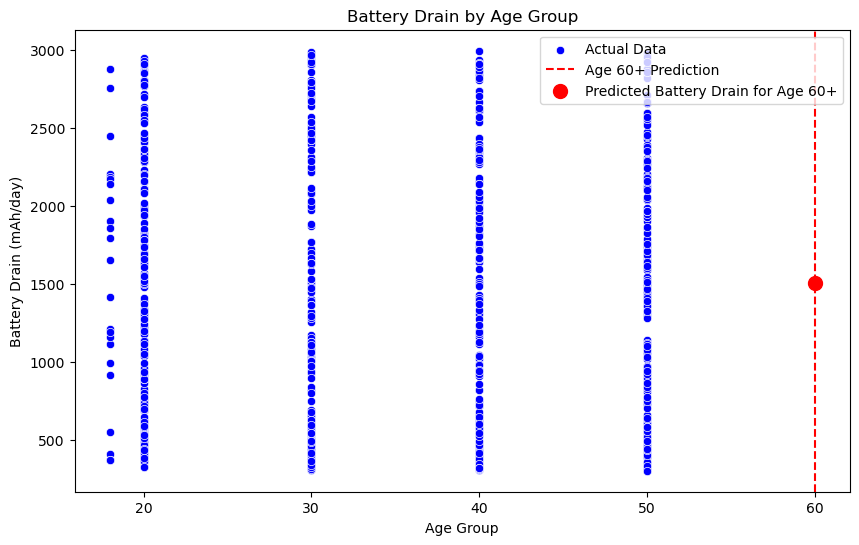

In [8]:
# Plot the relationship between Age Group Float and Battery Drain for existing data
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Age Group Float'], y=target, color='blue', label='Actual Data')
plt.axvline(x=60, color='red', linestyle='--', label='Age 60+ Prediction')
plt.scatter(60, battery_drain_60_plus, color='red', s=100, label='Predicted Battery Drain for Age 60+')

# Adding labels and title
plt.title('Battery Drain by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Battery Drain (mAh/day)')
plt.legend()

# Show plot
plt.show()
